<a href="https://colab.research.google.com/github/EfanovNikita/speech_recognition/blob/master/speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для оценки качества распознования речи чаще всего используют метрику WER - процент неправильно распознаных слов. Она хорошо работает для аналитических языков, таких как английский, испанский, итальянский. Но для синтетических языков, таких как русский, WER бывает завышен и менее показателен. Поэтому в этой работе используется метрика CER - процент неправильно предсказанных символов.

In [ ]:
!pip install datasets jiwer SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.1 MB/s eta 0:00:00


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition
import jiwer
from datasets import load_dataset
from IPython.display import Audio, display

In [ ]:
rus_Cyrl = load_dataset("wuenlp/sib-fleurs", "rus_Cyrl", split="test")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/rus_Cyrl/train-00000-of-00002.parqu(…):   0%|          | 0.00/471M [00:00<?, ?B/s]

data/rus_Cyrl/train-00001-of-00002.parqu(…):   0%|          | 0.00/453M [00:00<?, ?B/s]

data/rus_Cyrl/validation-00000-of-00001.(…):   0%|          | 0.00/117M [00:00<?, ?B/s]

data/rus_Cyrl/test-00000-of-00001.parque(…):   0%|          | 0.00/280M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/733 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/71 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/173 [00:00<?, ? examples/s]

In [ ]:
data = rus_Cyrl[:5]
clean_audio = [audio[0]['array'] for audio in data['audio']]
noise_audio = [audio[0]['array'] + np.random.normal(0, 0.018, len(audio[0]['array'])) for audio in data['audio']]
transcribe = data['sentence'][:]

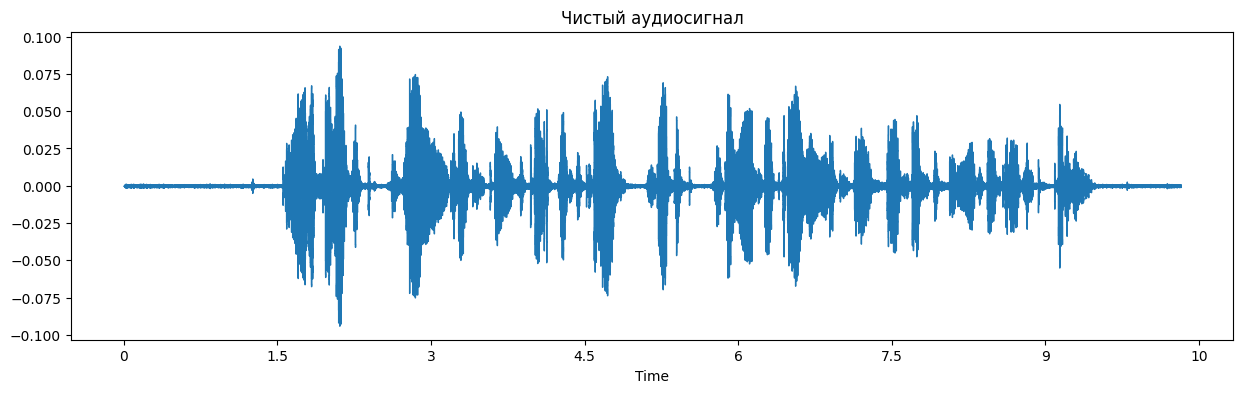

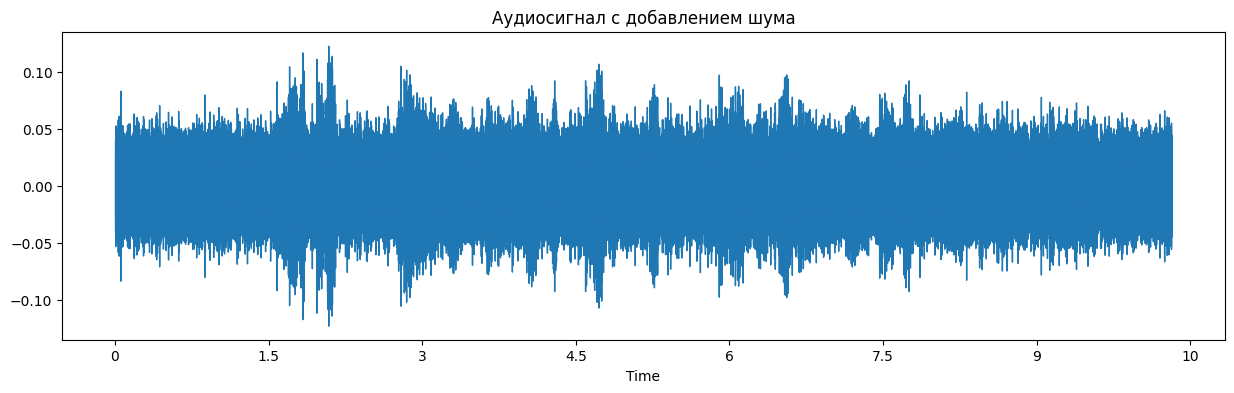

Чистый сигнал: По мере того как знание греческого языка ухудшалось Запад оказался отрезанным от своих философских и научных греческих корней
Шумный сигнал: По мере того как Сигнальная группа
Транскрипция: По мере того как знание греческого языка ухудшалось, Запад оказался отрезанным от своих философских и научных греческих корней.
CER для чистого сигнала: 0.0157
CER для шумного сигнала: 0.7874





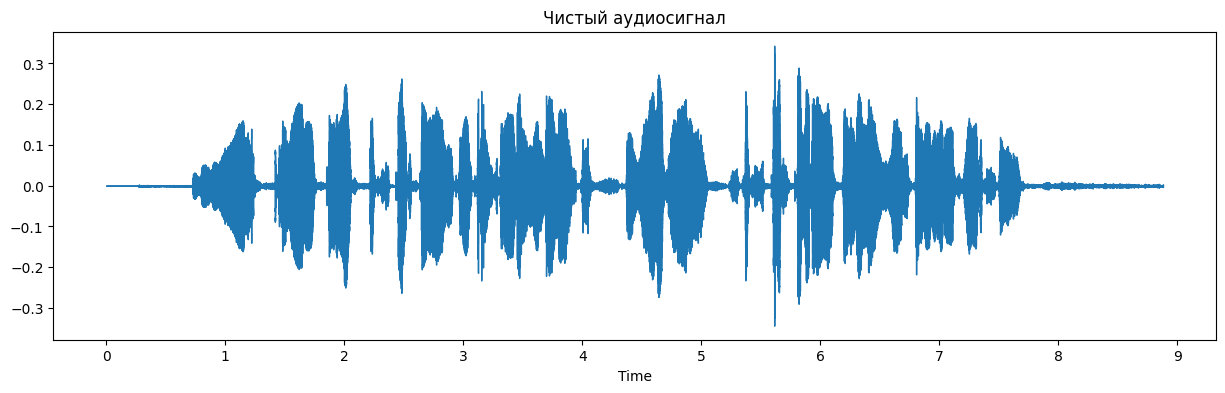

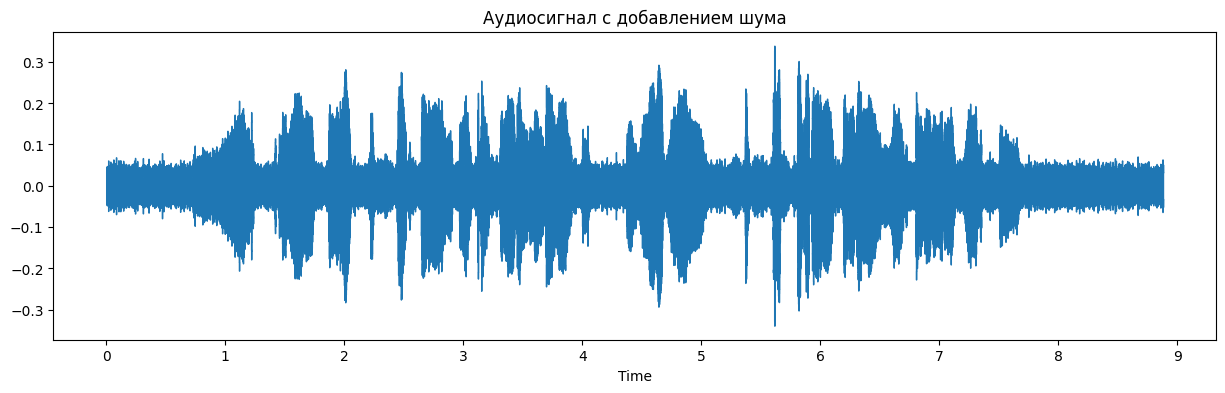

Чистый сигнал: Даниэль ланталь Эксперт ООН по вопросам данной болезни заявила что вспышка вероятно была вызвана миротворцами
Шумный сигнал: Даниэль ланталь Эксперт ООН по вопросам данной болезни заявила что вспышка вероятно была вызвана миротворцами
Транскрипция: Даниэль Лантань, эксперт ООН по вопросам данной болезни, заявила, что вспышка, вероятно, была вызвана миротворцами.
CER для чистого сигнала: 0.0783
CER для шумного сигнала: 0.0783





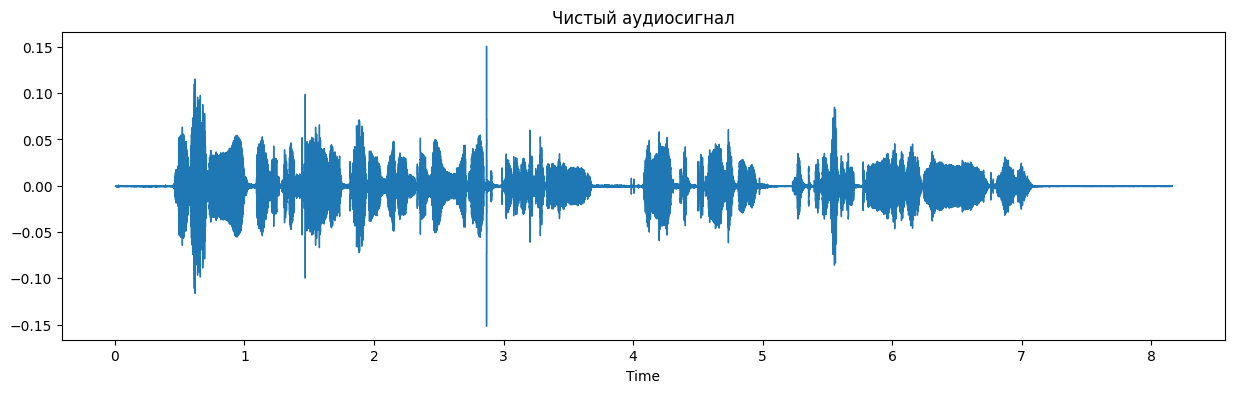

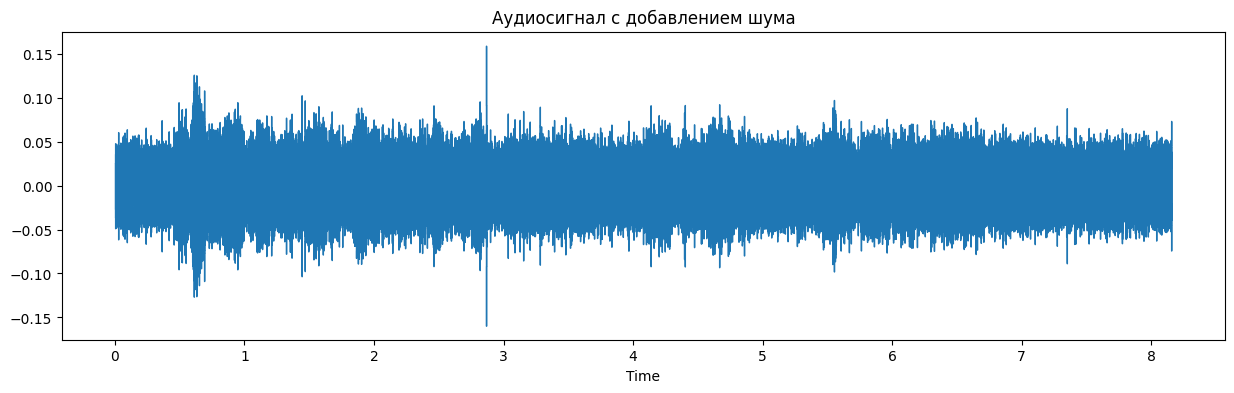

Чистый сигнал: большие области дали к северу довольно редко заселены А некоторые из них практически незаселённые глушь
Шумный сигнал: большие области дали к северу довольно редко заселены А некоторые из них фактически незаселённые вещи
Транскрипция: Большие области далее к северу довольно редко заселены, а некоторые из них – практически незаселённая глушь.
CER для чистого сигнала: 0.0926
CER для шумного сигнала: 0.1574





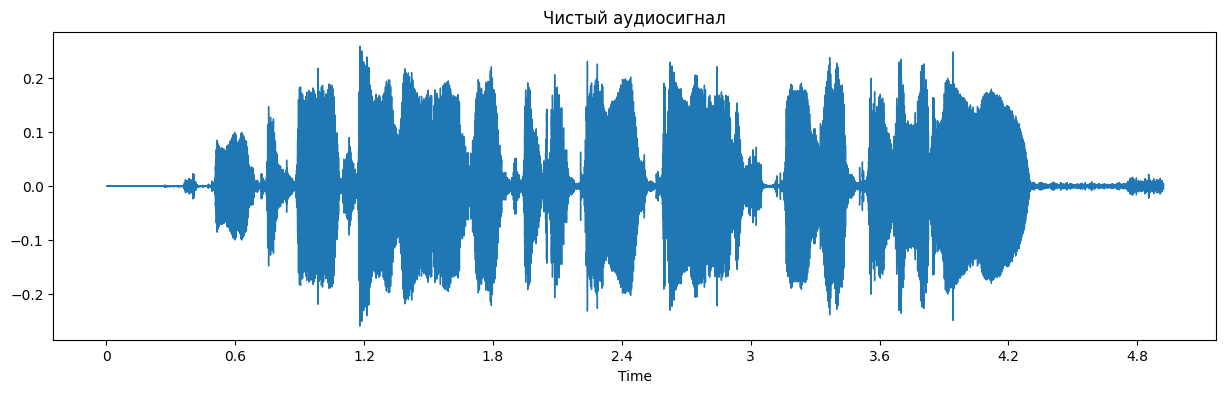

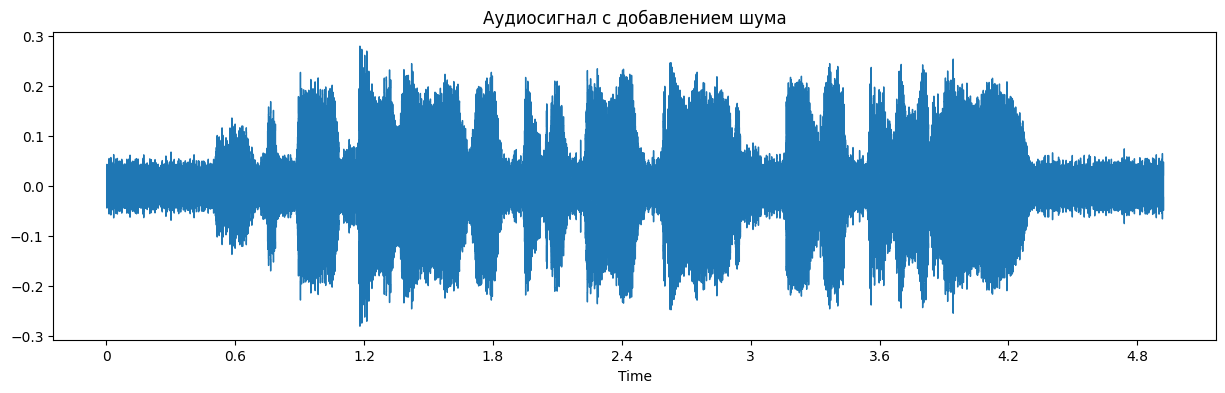

Чистый сигнал: вскоре после начала военных действий Британии устроила морскую блокаду Германии
Шумный сигнал: ой после начала военных действий в Британии устроила морскую блокаду Германии
Транскрипция: Вскоре после начала военных действий Британия устроила морскую блокаду Германии.
CER для чистого сигнала: 0.0375
CER для шумного сигнала: 0.1125





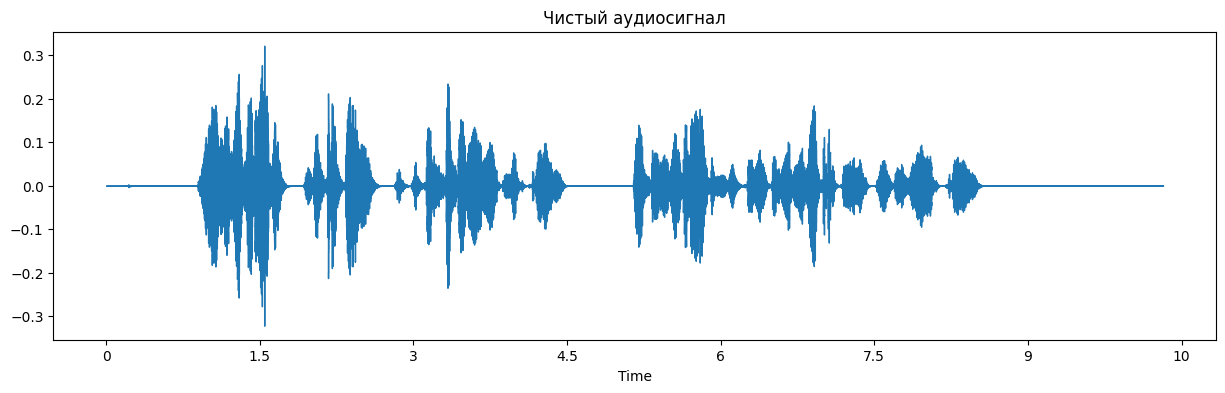

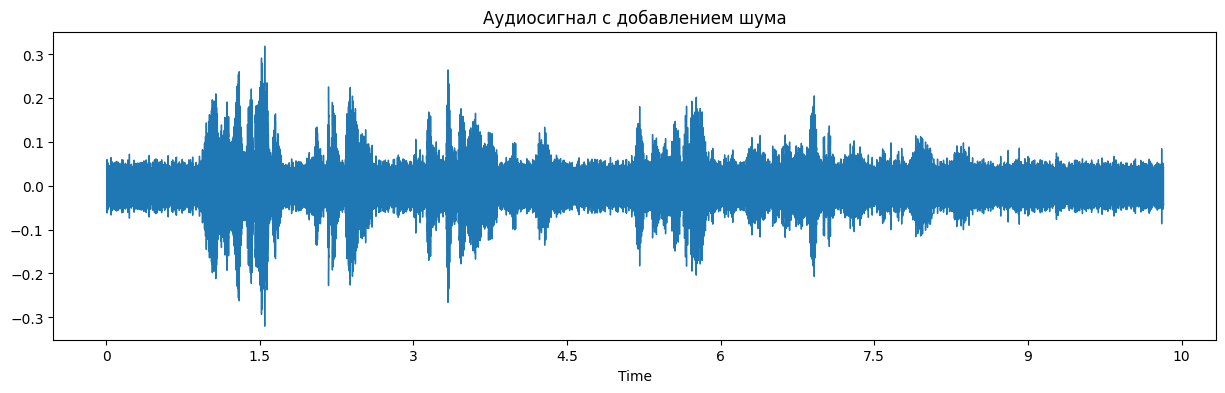

Чистый сигнал: ионы водорода - это протоны от которых отделены электроны атома водорода состоят из одного протона и одного электрона
Шумный сигнал: ионы водорода - это протоны от которых отделены электроны атома водорода состоят из одного протона и одного электрона
Транскрипция: Ионы водорода — это протоны, от которых отделены электроны (атомы водорода состоят из одного протона и одного электрона).
CER для чистого сигнала: 0.0579
CER для шумного сигнала: 0.0579





In [ ]:
for i in range(len(clean_audio)):

    # Создаем график чистого сигнала
    plt.figure(figsize=(15, 4))
    librosa.display.waveshow(clean_audio[i], sr=16000)
    plt.title('Чистый аудиосигнал')
    plt.show()

    # Слушаем сигнал
    display(Audio(clean_audio[i], rate=16000))

    # Создаем график зашумленного сигнала
    plt.figure(figsize=(15, 4))
    librosa.display.waveshow(noise_audio[i], sr=16000)
    plt.title('Аудиосигнал с добавлением шума')
    plt.show()

    # Слушаем сигнал с шумом
    display(Audio(noise_audio[i], rate=16000))

    # готовим данные для SpeechRecognition
    # Используем математическую магию, чтобы правильно преобразовать float данные в int
    # Каждое значение лежит в диапозоне -2**15 < x < 2**15
    clean_data = speech_recognition.AudioData((clean_audio[i] * (2 ** 15 - 1)).astype('<h'), 16000, 2)
    noise_data = speech_recognition.AudioData((noise_audio[i] * (2 ** 15 - 1)).astype('<h'), 16000, 2)

    # Опознователь речи
    recognizer = speech_recognition.Recognizer()

    # распознаем речь
    clean_text = recognizer.recognize_google(audio_data=clean_data, language="ru-RU")
    noise_text = recognizer.recognize_google(audio_data=noise_data, language="ru-RU")

    print(f'Чистый сигнал: {clean_text}')
    print(f'Шумный сигнал: {noise_text}')
    print(f'Транскрипция: {transcribe[i]}')

    # метрики
    print(f'CER для чистого сигнала: {jiwer.cer(transcribe[i], clean_text):.4f}')
    print(f'CER для шумного сигнала: {jiwer.cer(transcribe[i], noise_text):.4f}')
    print('\n'*2)

Как видно из результатов, чем меньше шума, тем лучше распознование. SpeechRecognition очень хорошо справляется со своей задачей даже в условиях умеренного зашумления. Для очищения сигнала от шумов нужно использовать допольнительные техники. Например в библиотеке SpeechRecognition имеется инструмент `adjust_for_ambient_noise` для удаления шумов.